In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import joblib

In [2]:
xgboost = joblib.load('../models/best_model_xgboost.pkl')
xgboost

/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:55:41] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=550, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [3]:
random_forest = joblib.load('../models/best_model_random_forest.pkl')
random_forest

/usr/local/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


RandomForestClassifier(max_depth=35, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=450, random_state=42, verbose=2)

In [4]:
tat = pd.read_csv("../data/lucas_organic_carbon_training_and_test_data_NEW.csv")

targets = pd.read_csv("../data/lucas_organic_carbon_target.csv")


In [5]:
tat.describe()

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
count,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,...,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000,9895.000000
mean,0.000318,0.000320,0.000322,0.000323,0.000325,0.000327,0.000329,0.000331,0.000333,0.000335,...,-0.000085,-0.000082,-0.000079,-0.000076,-0.000073,-0.000070,-0.000067,-0.000064,-0.000061,-0.000058
std,0.000130,0.000131,0.000132,0.000132,0.000133,0.000134,0.000134,0.000135,0.000136,0.000136,...,0.000047,0.000046,0.000046,0.000045,0.000045,0.000044,0.000044,0.000044,0.000043,0.000043
min,0.000016,0.000016,0.000016,0.000017,0.000017,0.000017,0.000017,0.000018,0.000018,0.000018,...,-0.000558,-0.000557,-0.000556,-0.000555,-0.000554,-0.000554,-0.000553,-0.000552,-0.000551,-0.000550
25%,0.000221,0.000223,0.000224,0.000226,0.000227,0.000229,0.000230,0.000231,0.000233,0.000234,...,-0.000110,-0.000107,-0.000104,-0.000100,-0.000097,-0.000094,-0.000091,-0.000088,-0.000085,-0.000082
50%,0.000310,0.000312,0.000314,0.000316,0.000318,0.000320,0.000321,0.000323,0.000325,0.000327,...,-0.000077,-0.000074,-0.000071,-0.000068,-0.000065,-0.000062,-0.000059,-0.000056,-0.000053,-0.000050
75%,0.000408,0.000410,0.000412,0.000415,0.000417,0.000419,0.000422,0.000424,0.000426,0.000429,...,-0.000051,-0.000049,-0.000046,-0.000043,-0.000040,-0.000038,-0.000035,-0.000032,-0.000029,-0.000026
max,0.000876,0.000881,0.000887,0.000892,0.000897,0.000902,0.000907,0.000912,0.000917,0.000923,...,0.000033,0.000035,0.000039,0.000043,0.000047,0.000051,0.000055,0.000060,0.000064,0.000068


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tat)
scaled_df = pd.DataFrame(scaled_data, columns=tat.columns)
scaled_df

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
0,-0.317694,-0.318224,-0.318744,-0.319256,-0.319759,-0.320253,-0.320739,-0.321217,-0.321686,-0.322148,...,0.320884,0.311196,0.301124,0.290665,0.279820,0.268590,0.256980,0.244997,0.232651,0.219954
1,0.256876,0.254926,0.252993,0.251076,0.249174,0.247289,0.245420,0.243566,0.241727,0.239904,...,0.953367,0.949280,0.944598,0.939293,0.933338,0.926704,0.919368,0.911309,0.902508,0.892950
2,0.091526,0.090582,0.089648,0.088721,0.087803,0.086892,0.085990,0.085095,0.084209,0.083330,...,-0.016399,-0.031121,-0.046161,-0.061504,-0.077135,-0.093032,-0.109173,-0.125532,-0.142080,-0.158787
3,-0.132203,-0.129195,-0.126215,-0.123263,-0.120339,-0.117442,-0.114573,-0.111730,-0.108914,-0.106124,...,-0.503614,-0.486400,-0.468538,-0.450026,-0.430868,-0.411068,-0.390637,-0.369589,-0.347943,-0.325724
4,0.536071,0.533381,0.530712,0.528063,0.525434,0.522825,0.520236,0.517667,0.515117,0.512587,...,0.194378,0.177311,0.159763,0.141743,0.123262,0.104338,0.084991,0.065242,0.045121,0.024658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,1.068931,1.065211,1.061515,1.057844,1.054196,1.050572,1.046972,1.043396,1.039844,1.036315,...,-1.896294,-1.884456,-1.871355,-1.856935,-1.841145,-1.823937,-1.805269,-1.785104,-1.763413,-1.740174
9891,-0.533231,-0.528060,-0.522935,-0.517854,-0.512817,-0.507825,-0.502875,-0.497969,-0.493105,-0.488283,...,0.317374,0.315407,0.313229,0.310831,0.308203,0.305338,0.302229,0.298870,0.295256,0.291383
9892,0.557028,0.562643,0.568195,0.573686,0.579116,0.584485,0.589796,0.595047,0.600241,0.605379,...,-1.968334,-1.971239,-1.973170,-1.974056,-1.973825,-1.972409,-1.969740,-1.965754,-1.960391,-1.953597
9893,0.121474,0.111586,0.101796,0.092101,0.082501,0.072994,0.063580,0.054258,0.045026,0.035884,...,1.528755,1.514539,1.499200,1.482700,1.465000,1.446070,1.425882,1.404414,1.381652,1.357588


In [7]:
from sklearn.model_selection import train_test_split
tat_train, tat_test, targets_train, targets_test = train_test_split(scaled_data, targets, test_size=0.2, random_state=42)

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(tat_train, targets_train)
gnb.score(tat_test, targets_test)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4987367357251137

In [9]:
y_pred_xgboost = xgboost.predict(tat_test)
y_pred_randomforest = random_forest.predict(tat_test)
y_pred_gnb = gnb.predict(tat_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.4s


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_pred_randomforest = label_encoder.fit_transform(y_pred_randomforest)
y_pred_gnb = label_encoder.fit_transform(y_pred_gnb)

In [11]:
y_pred_xgboost

array([4, 2, 2, ..., 4, 4, 1], dtype=int32)

In [12]:
xgpred = pd.DataFrame(y_pred_xgboost, columns = ['XGboost'])
random_forestpred = pd.DataFrame(y_pred_randomforest, columns = ['randomforst'])
gnbpred = pd.DataFrame(y_pred_gnb, columns = ['GNB'])

In [13]:
df = pd.concat([xgpred, random_forestpred, gnbpred], axis=1)
df

,XGboost,randomforst,GNB
0,4,4,4
1,2,2,0
2,2,2,2
3,4,4,2
4,3,3,3
...,...,...,...
1974,4,4,4
1975,4,4,1
1976,4,4,3
1977,4,4,4


In [14]:
dicts = {}

for x in range(5):
    for r in range(5):
        key_part_1 = f"x{x}"
        key_part_2 = f"r{r}"
        key = (key_part_1, key_part_2)
        dicts[key] = 0

for r in range(5):
    for g in range(5):
        key_part_1 = f"r{r}"
        key_part_2 = f"g{g}"
        key = (key_part_1, key_part_2)
        dicts[key] = 0

for index, row in df.iterrows():
    key_part_1 = f"x{row['XGboost']}"
    key_part_2 = f"r{row['randomforst']}"
    key1 = (key_part_1, key_part_2)
    
    dicts[key1] = dicts[key1] + 1
    
    key_part_1 = f"r{row['randomforst']}"
    key_part_2 = f"g{row['GNB']}"
    key2 = (key_part_1, key_part_2)
    
    dicts[key2] = dicts[key2] + 1
dicts

{('x0', 'r0'): 94,
 ('x0', 'r1'): 2,
 ('x0', 'r2'): 18,
 ('x0', 'r3'): 5,
 ('x0', 'r4'): 10,
 ('x1', 'r0'): 3,
 ('x1', 'r1'): 32,
 ('x1', 'r2'): 8,
 ('x1', 'r3'): 0,
 ('x1', 'r4'): 45,
 ('x2', 'r0'): 13,
 ('x2', 'r1'): 14,
 ('x2', 'r2'): 106,
 ('x2', 'r3'): 0,
 ('x2', 'r4'): 28,
 ('x3', 'r0'): 3,
 ('x3', 'r1'): 0,
 ('x3', 'r2'): 1,
 ('x3', 'r3'): 19,
 ('x3', 'r4'): 0,
 ('x4', 'r0'): 0,
 ('x4', 'r1'): 9,
 ('x4', 'r2'): 8,
 ('x4', 'r3'): 0,
 ('x4', 'r4'): 1561,
 ('r0', 'g0'): 49,
 ('r0', 'g1'): 4,
 ('r0', 'g2'): 11,
 ('r0', 'g3'): 49,
 ('r0', 'g4'): 0,
 ('r1', 'g0'): 16,
 ('r1', 'g1'): 17,
 ('r1', 'g2'): 14,
 ('r1', 'g3'): 6,
 ('r1', 'g4'): 4,
 ('r2', 'g0'): 47,
 ('r2', 'g1'): 10,
 ('r2', 'g2'): 62,
 ('r2', 'g3'): 16,
 ('r2', 'g4'): 6,
 ('r3', 'g0'): 0,
 ('r3', 'g1'): 0,
 ('r3', 'g2'): 0,
 ('r3', 'g3'): 24,
 ('r3', 'g4'): 0,
 ('r4', 'g0'): 282,
 ('r4', 'g1'): 198,
 ('r4', 'g2'): 128,
 ('r4', 'g3'): 127,
 ('r4', 'g4'): 909}

In [15]:
labels = []
for x in range(5):
    labels.append(f"x{x}")
for r in range(5):
    labels.append(f"r{r}")
for g in range(5):
    labels.append(f"g{g}")
labels

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'r0',
 'r1',
 'r2',
 'r3',
 'r4',
 'g0',
 'g1',
 'g2',
 'g3',
 'g4']

In [16]:
sources = []
targets = [] 
values = []

for key in dicts:
    (source, target) = key
    source_index = labels.index(source)
    target_index = labels.index(target)
    value = dicts[key]
    sources.append(source_index)
    targets.append(target_index)
    values.append(value)

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values 
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [18]:
ncolor0 = 'rgba(230, 159, 0, 1)'
ncolor1 = 'rgba(0, 158, 115, 1)'
ncolor2 = 'rgba(0, 114, 178, 1)'
ncolor3 = 'rgba(213, 94, 0, 1)'
ncolor4 = 'rgba(204, 121, 167, 1)'

color_node = []

for n in range(3):
    color_node.append(ncolor0)
    color_node.append(ncolor1)
    color_node.append(ncolor2)
    color_node.append(ncolor3)
    color_node.append(ncolor4)
  

color_node

['rgba(230, 159, 0, 1)',
 'rgba(0, 158, 115, 1)',
 'rgba(0, 114, 178, 1)',
 'rgba(213, 94, 0, 1)',
 'rgba(204, 121, 167, 1)',
 'rgba(230, 159, 0, 1)',
 'rgba(0, 158, 115, 1)',
 'rgba(0, 114, 178, 1)',
 'rgba(213, 94, 0, 1)',
 'rgba(204, 121, 167, 1)',
 'rgba(230, 159, 0, 1)',
 'rgba(0, 158, 115, 1)',
 'rgba(0, 114, 178, 1)',
 'rgba(213, 94, 0, 1)',
 'rgba(204, 121, 167, 1)']

In [19]:
lcolor0 = 'rgba(230, 159, 0, 0.5)'
lcolor1 = 'rgba(0, 158, 115, 0.5)'
lcolor2 = 'rgba(0, 114, 178, 0.5)'
lcolor3 = 'rgba(213, 94, 0, 0.5)'
lcolor4 = 'rgba(204, 121, 167, 0.5)'

color_link = []

for n in range(12):
    color_link.append(lcolor0)
    color_link.append(lcolor1)
    color_link.append(lcolor2)
    color_link.append(lcolor3)
    color_link.append(lcolor4)

color_link

['rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0.5)',
 'rgba(0, 114, 178, 0.5)',
 'rgba(213, 94, 0, 0.5)',
 'rgba(204, 121, 167, 0.5)',
 'rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0.5)',
 'rgba(0, 114, 178, 0.5)',
 'rgba(213, 94, 0, 0.5)',
 'rgba(204, 121, 167, 0.5)',
 'rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0.5)',
 'rgba(0, 114, 178, 0.5)',
 'rgba(213, 94, 0, 0.5)',
 'rgba(204, 121, 167, 0.5)',
 'rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0.5)',
 'rgba(0, 114, 178, 0.5)',
 'rgba(213, 94, 0, 0.5)',
 'rgba(204, 121, 167, 0.5)',
 'rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0.5)',
 'rgba(0, 114, 178, 0.5)',
 'rgba(213, 94, 0, 0.5)',
 'rgba(204, 121, 167, 0.5)',
 'rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0.5)',
 'rgba(0, 114, 178, 0.5)',
 'rgba(213, 94, 0, 0.5)',
 'rgba(204, 121, 167, 0.5)',
 'rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0.5)',
 'rgba(0, 114, 178, 0.5)',
 'rgba(213, 94, 0, 0.5)',
 'rgba(204, 121, 167, 0.5)',
 'rgba(230, 159, 0, 0.5)',
 'rgba(0, 158, 115, 0

In [20]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = color_node
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values,
      label = labels,
      color = color_link
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10, width=1000, height=800)
fig.show()

# Confusion Matrizen

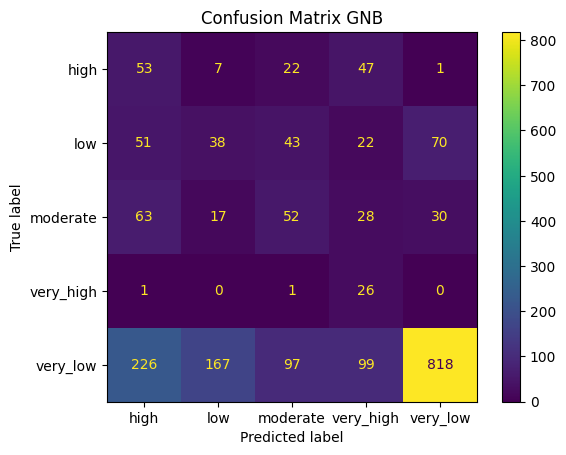

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    gnb,
    tat_test,
    targets_test
)
disp.ax_.set_title("Confusion Matrix GNB")

plt.show()

In [22]:
targets_test

,x
6476,very_low
1496,high
2225,low
932,low
7908,very_high
...,...
1665,very_low
1416,very_low
6505,very_low
9366,very_low


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



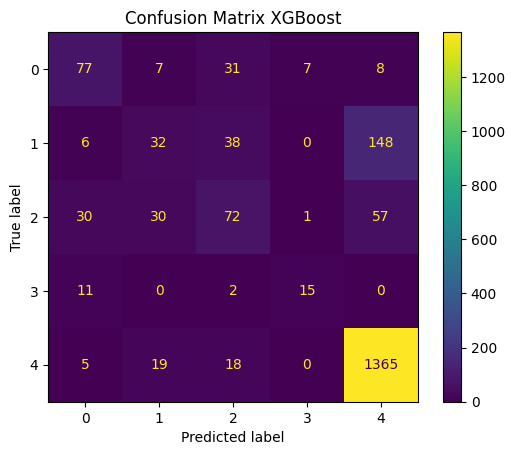

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    xgboost,
    tat_test,
    label_encoder.fit_transform(targets_test)
)
disp.ax_.set_title("Confusion Matrix XGBoost")

plt.show()

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.3s


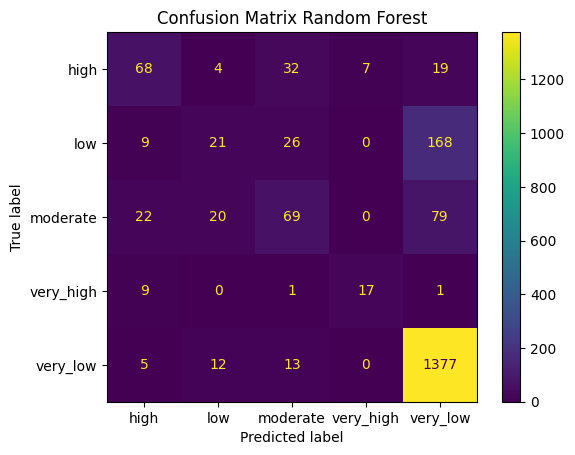

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    random_forest,
    tat_test,
    targets_test
)
disp.ax_.set_title("Confusion Matrix Random Forest")

plt.show()